In [2]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import sys
import time

to call numpy use np.X

This allows us to avoid having to type numpy.x for every call (there migt be a lot of those calls)

In [20]:
def onpick(event):
    selected = event.artist
    xdata = selected.get_xdata()
    ydata = selected.get_ydata()
    points = xdata, ydata
    combinedXY = np.dstack((X,Y))
    junk, index, junk1 = np.where(combinedXY == (xdata[0],ydata[0]))
    #print (xdata,ydata)
    #print (index[0])
    if TOF[index[0]] != 1:
        TOF[index[0]] += 1
        event.artist.set(color='red')
        fig.show()
        print ('drawn')
    #print (TOF[index[0]])
    return points
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Loading directory for finding path to input and output files

In [4]:
Dir = os.path.dirname(os.path.abspath('__file__'))

print (Dir)
filename = sys.argv[1]

/home/nolan/Astrobotics/autonomy/pylabel


TODO: change to use STin for defining filenames in command line call

or change to innumerate over all files in the folder, one after the other

Reading the values for r, theta, and intensity into separate numpy arrays

In [5]:
r, theta, intensity = np.loadtxt(Dir+'/'+filename,delimiter=' ', skiprows=11, usecols=(0,1,2), unpack=True)

converting r theta to x coordinates

In [6]:
X = np.array([])
for i in range(len(r)) :
    value = r[i] * math.cos(theta[i])
    #print (value)
    X = np.append(X , value)
#print (X)

converting r theta to y coordinates

In [7]:
Y = np.array([])
for i in range(len(r)) :
    value = r[i] * math.sin(theta[i])
    #print (value)
    Y = np.append(Y , value)
#print (Y)

populating point on X&Y axis

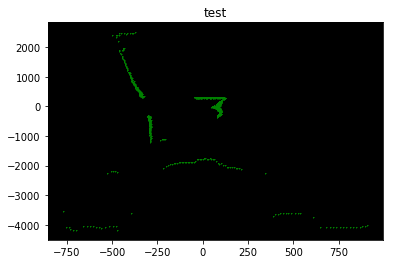

In [16]:
#print (len(X))
for i in range(len(X)):
    plt.plot(X[i],Y[i], color='green', marker='+', markersize=1, picker=5)
ax = plt.gca()
ax.set_title('test')
ax.set_facecolor('black')


In [9]:
TOF = np.array([])
for i in range(len(X)):
    TOF = np.append(TOF, 0)

In [10]:
fig.canvas.mpl_connect('pick_event', onpick)
plt.show()
timestr = time.strftime("%Y%m%d-%H%M%S")
outputarray = np.column_stack((r, theta, intensity, TOF))
print (outputarray)
with open(Dir+'/output/'+timestr+'output', 'w') as outfile:
    np.savetxt(outfile, outputarray, delimiter = ' ', header='values = r, theta, intensity, yes or no')